# 경사 하강법

우리는 step1에서 간단한 2차원 평면의 x, y에 대해서 정답값인 y에 가깝게 예측하는 연습을 하였다. 3차원에서는 어떻게해야할까? 3차원에서는 단순한 모델로 한번에 가중치를 찾는것은 쉽지 않을것이다. 따라서 우리는 경사 하강법, 즉 손실값이 어떤 가중치에 대해 최소가 되는 구간을 찾아 최소가 되는 지점의 가중치로 업데이트를하는것이다.

gradient란 해당 방향으로의 편미분 값을 계산한것으로, 예를들어 산 정상에서 출발하여, 가장 최소거리로 산을 내려올수있는 방향을 찾아주는 수학적 이론이다. 즉 gradient의 방향으로 가중치를 업데이트한다면, 가장 빠르게 최적의 가중치를 찾고 손실값을 최소로 만들 수 있을것이다. 이는 앞으로 배울 머신러닝에서 가장 핵심적인 내용으로 반드시 익히는거이 좋다.

이번에 다룰 데이터는 좀더 복잡하고 비선형적인 3차원 데이터를 가지고 이용할것이다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import LinearLocator
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
import csv

In [2]:
class MyData:
    def __init__(self):
        pass
    def get_clean_data(self):
        data = np.genfromtxt("./step2_data/point_clean.csv", delimiter = ',')
        return data
    def get_noisy_data(self):
        data = np.genfromtxt("./step2_data/point_noisy.csv", delimiter = ',')
        return data

data = MyData()
point_clean = data.get_clean_data()
point_noisy = data.get_noisy_data()

x_clean = point_clean[0].reshape(20, 20)
y_clean = point_clean[1].reshape(20, 20)
z_clean = point_clean[2].reshape(20, 20)

x_noisy = point_noisy[0].reshape(20, 20)
y_noisy = point_noisy[1].reshape(20, 20)
z_noisy = point_noisy[2].reshape(20, 20)

print(x_clean.shape, y_clean.shape, z_clean.shape)
print(x_noisy.shape, y_noisy.shape, z_noisy.shape)

(20, 20) (20, 20) (20, 20)
(20, 20) (20, 20) (20, 20)


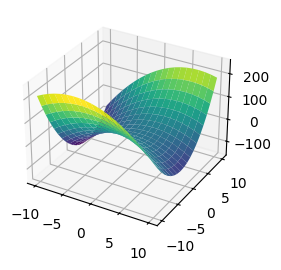

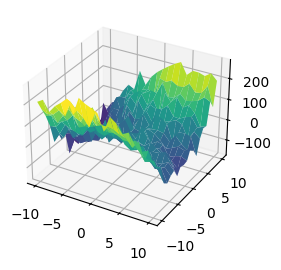

In [3]:
class MyPlot:
    def __init__(self):
        self.figsize = (3,3)

    def plot_surface(self, x, y, z):
        fig = plt.figure(figsize = self.figsize)
        ax = fig.add_subplot(projection = '3d')
        surf = ax.plot_surface(x, y, z, cmap = 'viridis')
        plt.show()
        pass

plot = MyPlot()
plot.plot_surface(x_clean, y_clean, z_clean)
plot.plot_surface(x_noisy, y_noisy, z_noisy)


In [25]:
class MyModel:
    def __init__(self):
        self.lr = 0.00001
        self.w = np.zeros((6,1))
        self.feature = None

    def get_feature(self, x, y):
        x = x.reshape(400,1)
        y = y.reshape(400,1)
        self.feature = np.column_stack([np.ones((x.shape[0], 1)), x, y , x*y, (x**2), (y**2)])

    def predict(self):
        z_hat = self.feature @ self.w
        return z_hat
    
    def cal_loss(self, z, z_hat):
        z = z.reshape(400,1)
        
        loss = (1 / (2 * len(z))) * ((z_hat - z).T @ (z_hat - z)) * (self.w.T @ self.w)
        return loss.item()
    
    def compute_grad(self, z):
        I = np.eye(self.feature.shape[1])
        z = z.reshape(400,1)
        grad = (1 / self.feature.shape[0]) * (((self.feature.T @ self.feature) @ self.w) - self.feature.T @ z)
        
        return grad

    def update_weight(self, grad):
        self.w -= self.lr * grad

model = MyModel()
model.get_feature(x_noisy, y_noisy)
for i in range(500):
    z_hat = model.predict()
    loss = model.cal_loss(z_noisy, z_hat)
    grad = model.compute_grad(z_noisy)
    model.update_weight(grad)
    print(loss)
print(z_hat[0:10])


        

0.0
5.962527382323006
22.629958662367255
48.35388253767117
81.70272810816381
121.43336562440325
166.46649612288562
215.86531566434678
268.81701065632757
324.6167016624094
382.65350555893707
442.39843108202024
503.39386173194487
565.2444135439251
627.6089841451651
690.1938344444098
752.7465657966261
815.0508740292685
876.921977717892
938.2026319103153
998.7596504233703
1058.480870135382
1117.2724995952892
1175.0568019588814
1231.770068910237
1287.3608479751156
1341.7883906061152
1395.0212927229006
1447.0363031162094
1497.8172783504726
1547.3542655946028
1595.6426972324343
1642.6826832039246
1688.4783888490965
1733.0374876064698
1776.370679288819
1818.4912658495275
1859.4147775868369
1899.1586436317646
1937.7419013465378
1975.184939939622
2011.5092741943965
2046.737344722882
2080.8923416038147
2113.998048654552
2146.078705926351
2177.15888830908
2207.2633983900796
2236.417171937676
2264.645194576966
2291.972428397751
2318.4237473850226
2344.0238806941284
2368.797362907923
2392.7684905141

/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_2137/2607638600.py:13: RuntimeWarning: divide by zero encountered in matmul
  z_hat = self.feature @ self.w
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_2137/2607638600.py:13: RuntimeWarning: overflow encountered in matmul
  z_hat = self.feature @ self.w
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_2137/2607638600.py:13: RuntimeWarning: invalid value encountered in matmul
  z_hat = self.feature @ self.w


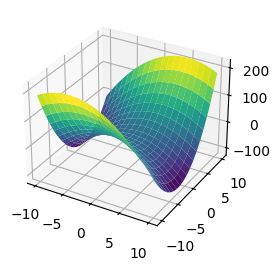

In [26]:
z_hat = z_hat.reshape(20, 20)
plot.plot_surface(x_noisy, y_noisy, z_hat)